In [63]:
#Imports
from nba_api.stats.static import teams
import pandas as pd
from nba_api.stats.endpoints import leaguegamefinder
import matplotlib.pyplot as plt

In [51]:
nba_teams=teams.get_teams()
nba_teams[0].items()

dict_items([('id', 1610612737), ('full_name', 'Atlanta Hawks'), ('abbreviation', 'ATL'), ('nickname', 'Hawks'), ('city', 'Atlanta'), ('state', 'Atlanta'), ('year_founded', 1949)])

In [52]:
#Function for converting dictionary into table
def one_dict(list_dict):
    keys=list_dict[0].keys()
    out_dict={key:[] for key in keys}
    for dict_ in list_dict:
        for key, value in dict_.items():
            out_dict[key].append(value)
    return out_dict

In [54]:
dict_nba_team=one_dict(nba_teams)

In [55]:
df_teams=pd.DataFrame(dict_nba_team)
df_teams.head()

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Atlanta,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


In [56]:
#Find specific row - example: Warriors
df_warriors=df_teams[df_teams['nickname']=='Warriors']
df_warriors

,id,full_name,abbreviation,nickname,city,state,year_founded
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946


In [57]:
#Accessing firt column of data frame
id_warriors=df_warriors[['id']].values[0][0]
id_warriors

1610612744

In [60]:
gamefinder=leaguegamefinder.LeagueGameFinder(team_id_nullable=id_warriors)
gamefinder

In [61]:
games=gamefinder.get_data_frames()[0]
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22020,1610612744,GSW,Golden State Warriors,0022000101,2021-01-04,GSW vs. SAC,W,240,137,...,0.857,3.0,45.0,48.0,41,4,6,11,28,31.0
1,22020,1610612744,GSW,Golden State Warriors,0022000092,2021-01-03,GSW vs. POR,W,239,137,...,0.765,11.0,42.0,53.0,23,4,7,15,24,15.0
2,22020,1610612744,GSW,Golden State Warriors,0022000078,2021-01-01,GSW vs. POR,L,239,98,...,0.879,3.0,41.0,44.0,19,4,9,15,28,-25.0
3,22020,1610612744,GSW,Golden State Warriors,0022000047,2020-12-29,GSW @ DET,W,241,116,...,0.722,4.0,36.0,40.0,21,8,8,19,28,10.0
4,22020,1610612744,GSW,Golden State Warriors,0022000038,2020-12-27,GSW @ CHI,W,239,129,...,0.900,10.0,31.0,41.0,25,17,4,12,23,1.6


In [62]:
#Create home and away games versus the Toronto Raptors
games_home=games[games['MATCHUP']=='GSW vs. TOR']
games_away=games[games['MATCHUP']=='GSW @ TOR']

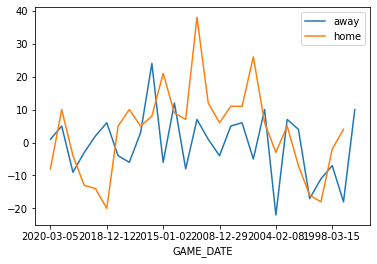

In [64]:
#Plotting home and away games stats
fig,ax=plt.subplots()
games_away.plot(x='GAME_DATE',y='PLUS_MINUS',ax=ax)
games_home.plot(x='GAME_DATE',y='PLUS_MINUS',ax=ax)
ax.legend(['away','home'])
plt.show()